In [3]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 from sklearn.preprocessing import MinMaxScaler
 from tensorflow.keras.layers import Dense,Dropout,LSTM
 from tensorflow.keras.models import Sequential
 import requests



api_key = 'af2b0fe7d54c41e89771b5e622783a4a'
symbol = 'BTC/USD'
interval = '1day'
order = 'asc'
start_date = '2021-05-15 00:00:00'
end_date = '2022-10-10 00:00:00'
api_url = f'https://api.twelvedata.com/time_series?symbol={symbol}&start_date={start_date}&end_date={end_date}&interval={interval}&order={order}&apikey={api_key}'


In [4]:
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv


--2022-11-01 13:14:40--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2022-11-01 13:14:40 (10.1 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [5]:
df=pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',parse_dates=['Date'],index_col=['Date'])
df.head(2)

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383


In [6]:
len(df)

2787

In [7]:
#only want closing price for each day
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)':"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


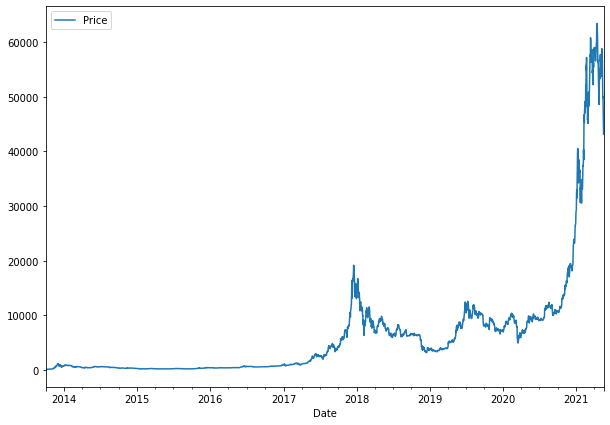

In [8]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))



**reading our data using python csv module**

In [9]:
import csv
from datetime import datetime

In [10]:
timesteps=[]
btc_price = []
with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv','r') as f:
  csv_reader = csv.reader(f,delimiter=",")
  next(csv_reader) #skip first line (get rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d")) # get the dates as date not string
    btc_price.append(float(line[2])) # get the closing price as float


In [11]:
btc_price[:10],timesteps[:10]

([123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116],
 [datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)])

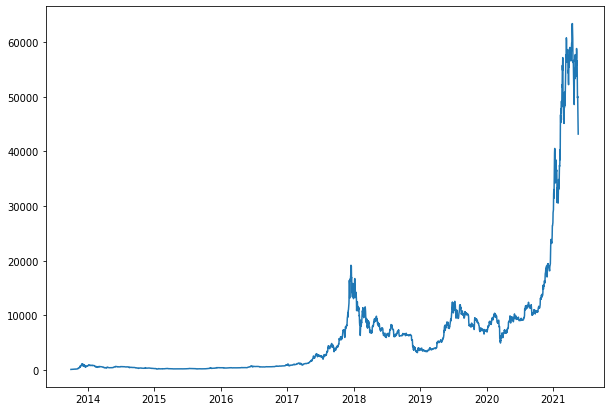

In [12]:
#plot from csv
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.plot(timesteps,btc_price)

#format data part 1: create train and test sets of out timeseris  data

In [13]:
bitcoin_prices[:5]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [14]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()
timesteps[:5],prices[:5]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866]))

In [15]:
#worng way for creating train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(timesteps,
                                                 prices,
                                                 test_size = 0.2,
                                                 random_state = 42  
                                                 
                                                 )
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2229,), (558,), (2229,), (558,))

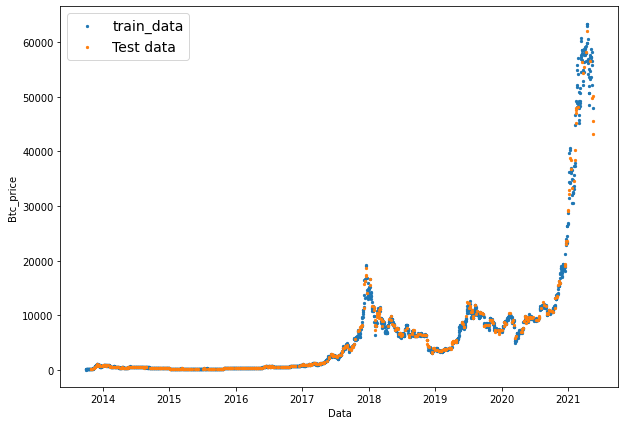

In [16]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label = 'train_data')
plt.scatter(X_test,y_test,s=5,label = 'Test data')
plt.xlabel("Data")
plt.ylabel('Btc_price')
plt.legend(fontsize = 14)
plt.show()

#Create train and test sets for time seris

In [17]:
split_size = int(0.8*len(prices)) #80% train and 20% test 

X_train,y_train = timesteps [:split_size],prices[:split_size]
X_test,y_test = timesteps[split_size:],prices[split_size:]


In [18]:
len(X_train),len(y_train),len(X_test),len(y_train)

(2229, 2229, 558, 2229)

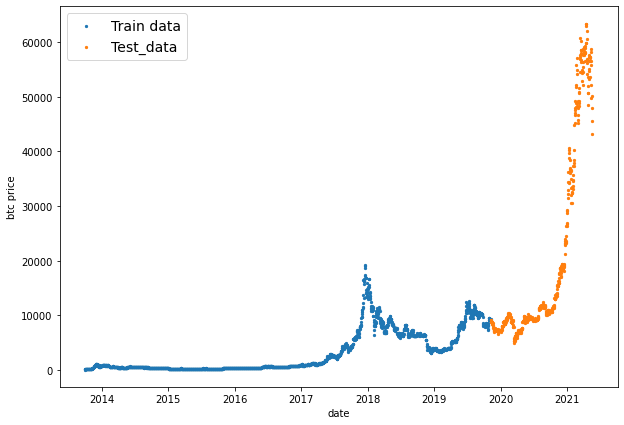

In [19]:
plt.figure(figsize = (10,7))
plt.scatter(X_train,y_train,s=5,label='Train data')
plt.scatter(X_test,y_test,s=5,label='Test_data')
plt.xlabel("date")
plt.ylabel("btc price")
plt.legend(fontsize=14)
plt.show();

In [20]:
#creating a plot function
def plot_time_series(timesteps,values,format='.',start=0,end=None,label=None):
  """
  timesteps: array pf timestpes values
  values: array of values across time
  format: style of plot,defalult
  start: where to start the plot
  end: where to end the plot
  label : label to show on plot about values , defalut is none

  """
  plt.plot(timesteps[start:end],values[start:end],format,label=label)
  plt.xlabel("Time")
  plt.ylabel('Btc price')
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

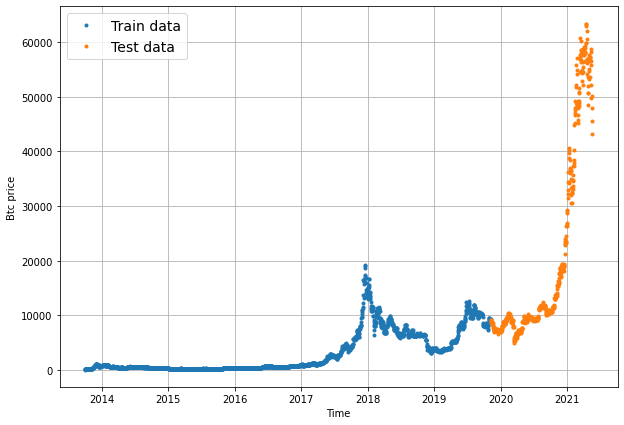

In [21]:
plt.figure(figsize=(10,7))
plot_time_series(X_train,y_train,label="Train data")
plot_time_series(X_test,y_test,label="Test data")

#Modeling expriments (Navie model)
$$\hat{y}_{t} = y_{t-1}$$

* **Horizon** = number of timesteops into the future we re going to predict
* **window size** = number of timesteps we re going to use to predict

In [22]:
 #create a navie forecast
 naive_forecast = y_test[:-1]
 naive_forecast[:10],naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [23]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

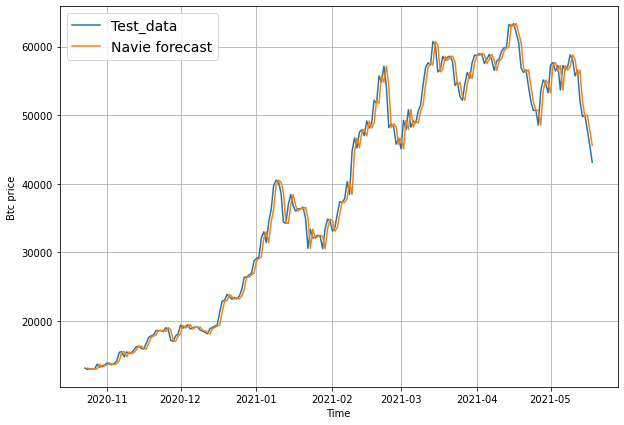

In [24]:
#plot navie forecast
plt.figure(figsize = (10,7))
# plot_time_series(X_train,y_train,label="Train_data")
plot_time_series(X_test,y_test,start=350,format='-',label="Test_data")
plot_time_series(X_test[1:],naive_forecast,start=350,format="-",label="Navie forecast")


In [25]:
import tensorflow as tf


In [26]:
def mean_absolute_scaled_error(y_true,y_pred):
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  mae_naive_no_season=tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))
  return mae/mae_naive_no_season


In [27]:
mean_absolute_scaled_error(y_test[1:],naive_forecast).numpy()

0.9995699939182624

In [28]:
def evaluate_preds(y_true,y_pred):
  #make sure floar32 datatype
  y_true = tf.cast(y_true,dtype = tf.float32)
  y_pred = tf.cast(y_pred,dtype = tf.float32)

  #calcuate the various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse =tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase=mean_absolute_scaled_error(y_true,y_pred)
  return{"mae":mae.numpy(),
          "mse":mse.numpy(),
          "rmse": rmse.numpy(),
          "mape":mape.numpy(),
           "mase":mase.numpy() }

In [29]:
naive_results = evaluate_preds(y_true = y_test[1:],
                               y_pred = naive_forecast
                               )
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

#Format Data part 2 :windowing our dataset
* [0,1,2,3,4,5,6] -> [7]
* [1,2,3,4,5,6,7] ->[8]
* [2,3,4,5,6,7,8] ->[9]

In [30]:
#what we want to do with our data
print(f"we want to use: {btc_price[:7]} to predict this: {btc_price[7]}" )

we want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [31]:
btc_price[:5]

[123.65499, 125.455, 108.58483, 118.67466, 121.33866]

In [32]:
HORIZON = 1    # predict next 1 day
WINDOW_SIZE =7  #use the past week of btc data to make this prediction


In [33]:
def get_labelled_window(x,horizon=HORIZON):
  return x[:,:-horizon],x[:,-horizon]


In [34]:
#test out the window labeling function
test_window , test_label, = get_labelled_window(tf.expand_dims(tf.range(8),axis=0))
print(f"Window:{tf.squeeze(test_window).numpy()}->Label:{tf.squeeze(test_label).numpy()}")

Window:[0 1 2 3 4 5 6]->Label:7


In [35]:
 #create a function to view numpy arrays as windows
 def make_windows(x,window_size = WINDOW_SIZE,horizon = HORIZON):
   """
   turns 1d array into 2d array of seq labbeled windows
   """
   windows_step = np.expand_dims(np.arange(window_size+horizon),axis=0)
   #create a 2d array of multiple windows
   window_indexes = windows_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis = 0).T
  #  print(f"window indexes:\n{window_indexes,window_indexes.shape}")

   #index on the target array with 2d array of multiple windows steps
   windowed_array=x[window_indexes]
   print(windowed_array)

   #get the labeled windows
   windows,labels = get_labelled_window(windowed_array,horizon=horizon)
   return windows, labels



In [36]:
full_windows,full_labels = make_windows(prices,window_size = WINDOW_SIZE,horizon = HORIZON)
len(full_windows),len(full_labels)

[[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361 43144.47129086]]


(2780, 2780)

In [37]:
#view first 3 windows/labels
for i in range(3):
  print(f"Window:{full_windows[i]} -> Label {full_labels[i]}")

Window:[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label 123.033
Window:[125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label 124.049
Window:[108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label 125.96116


In [38]:
#view first 3 windows/labels
for i in range(3):
  print(f"Window:{full_windows[i-3]} -> Label {full_labels[i-3]}")

Window:[58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label 47885.6252547166
Window:[58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label 45604.6157536131
Window:[55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label 43144.4712908603


In [39]:
#make train/test splits
def make_train_test_splits(windows,labels,test_split=0.2):
   split_size = int(len(windows)*(1-test_split)) #this seperate data in 80 20 
   train_windows = windows[:split_size]
   train_labels = labels[:split_size] 
   test_windows = windows[split_size:]
   test_labels = labels[split_size:]

   return train_windows,test_windows,train_labels,test_labels


In [40]:
#create train and test windows
train_windows , test_windows,train_labels,test_labels = make_train_test_splits(full_windows,full_labels)

In [41]:
len(train_windows) , len(test_windows),len(train_labels),len(test_labels)

(2224, 556, 2224, 556)

In [42]:
train_windows[:2],train_labels[:2]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ]]), array([123.033, 124.049]))

In [43]:
test_windows[:2],test_labels[:2]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463]]),
 array([8798.04205463, 9081.18687849]))

In [44]:
X_train[:5].shape

(5,)

#making a modeling checkpoint

In [45]:
import os
def create_model_checkpoint(model_name,save_path="model_experiment"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),verbose=0,save_best_only=True)
  



#model 1 : Dense Model (window = 7,horizon = 1)


In [46]:
train_windows

array([[ 123.65499   ,  125.455     ,  108.58483   , ...,  121.33866   ,
         120.65533   ,  121.795     ],
       [ 125.455     ,  108.58483   ,  118.67466   , ...,  120.65533   ,
         121.795     ,  123.033     ],
       [ 108.58483   ,  118.67466   ,  121.33866   , ...,  121.795     ,
         123.033     ,  124.049     ],
       ...,
       [9225.99547934, 9131.41063031, 9197.63234462, ..., 9202.41545055,
        9369.62808116, 9326.59962378],
       [9131.41063031, 9197.63234462, 9290.89660239, ..., 9369.62808116,
        9326.59962378, 9335.75240233],
       [9197.63234462, 9290.89660239, 9202.41545055, ..., 9326.59962378,
        9335.75240233, 9226.48582088]])

In [ ]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(1)
],name="model_1_dense")
model_1.compile(loss='mae',
                optimizer='adam',
                metrics=['mae'])
history = model_1.fit(train_windows,train_labels,epochs=100,batch_size = 128,validation_data = (test_windows,test_labels),callbacks= [create_model_checkpoint(model_name=model_1.name)])




Text(0, 0.5, 'epochs')

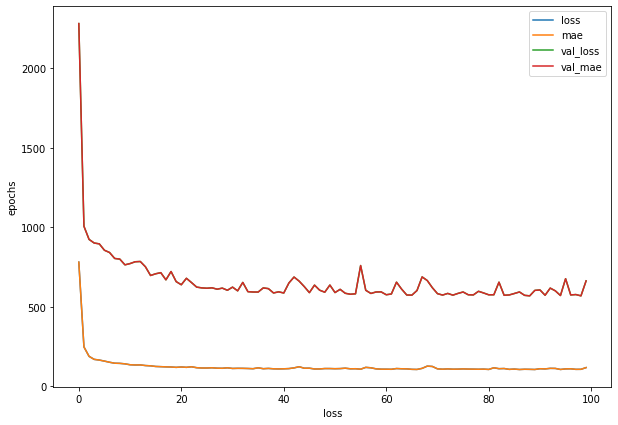

In [72]:
# pd.DataFrame(history.history['loss']).plot(figsize=(10,7))
pd.DataFrame(history.history).plot(figsize=(10,7))

plt.xlabel("loss")
plt.ylabel("epochs")

In [49]:
#eavaluate model on test data
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 662.5322 - mae: 662.5322


[662.5322265625, 662.5322265625]

In [50]:
#load in the save best model_1 and evaluate it ontest data
model_1 = tf.keras.models.load_model("model_experiment/model_1_dense")
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 568.5499 - mae: 568.5499


[568.5498657226562, 568.5498657226562]

In [51]:
#making forecast on the model
def make_preds(model,input_data):
   forecast = model.predict(input_data)
   return tf.squeeze(forecast) #return 1d array of prediction
   

In [52]:
model_1_preds = make_preds(model_1,test_windows)
len(model_1_preds),model_1_preds[:10]

18/18 [==============================] - 0s 4ms/step


(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8874.493, 8789.944, 9040.986, 8804.829, 8741.21 , 8749.837,
        8705.865, 8513.171, 8478.415, 8536.302], dtype=float32)>)

In [56]:
model_1_preds.shape

TensorShape([556])

In [54]:
model_1_results = evaluate_preds(y_true=test_labels,y_pred = model_1_preds)
model_1_results

{'mae': 568.5498,
 'mse': 1172587.4,
 'rmse': 1082.8607,
 'mape': 2.549229,
 'mase': 0.99878454}

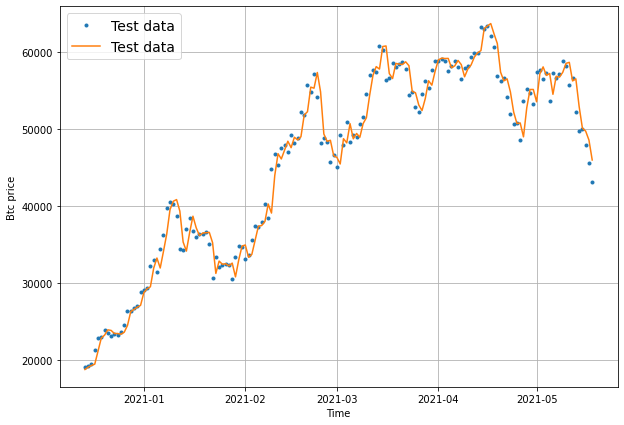

In [63]:
#lets plot our model 1 predicitons
offset = 400
plt.figure(figsize = (10,7))
#account for the test window offset and index into test_labels to ensure correct ploting
plot_time_series(timesteps=X_test[-len(test_windows):],values = test_labels[:,],start=offset,label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values = model_1_preds,
                 start=offset,
                 format='-',
                 label="Test data")
